In [8]:
install.packages("maxLik")
install.packages("extraDistr")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(MASS)
library(maxLik)
library(extraDistr)

ERROR: ignored

In [ ]:
set.seed(1)

#1
z <- rbinom(10000,1,0.7)

#2
Teta1 <- 0.5

Teta2 <- 0.5

Lambda <- Teta1 + Teta2 * z 
#3
x <- rpois(10000, lambda = Lambda)





4.

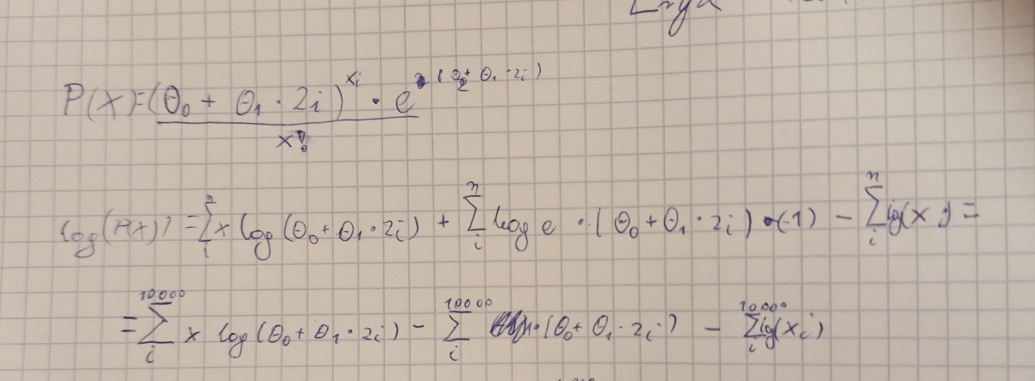

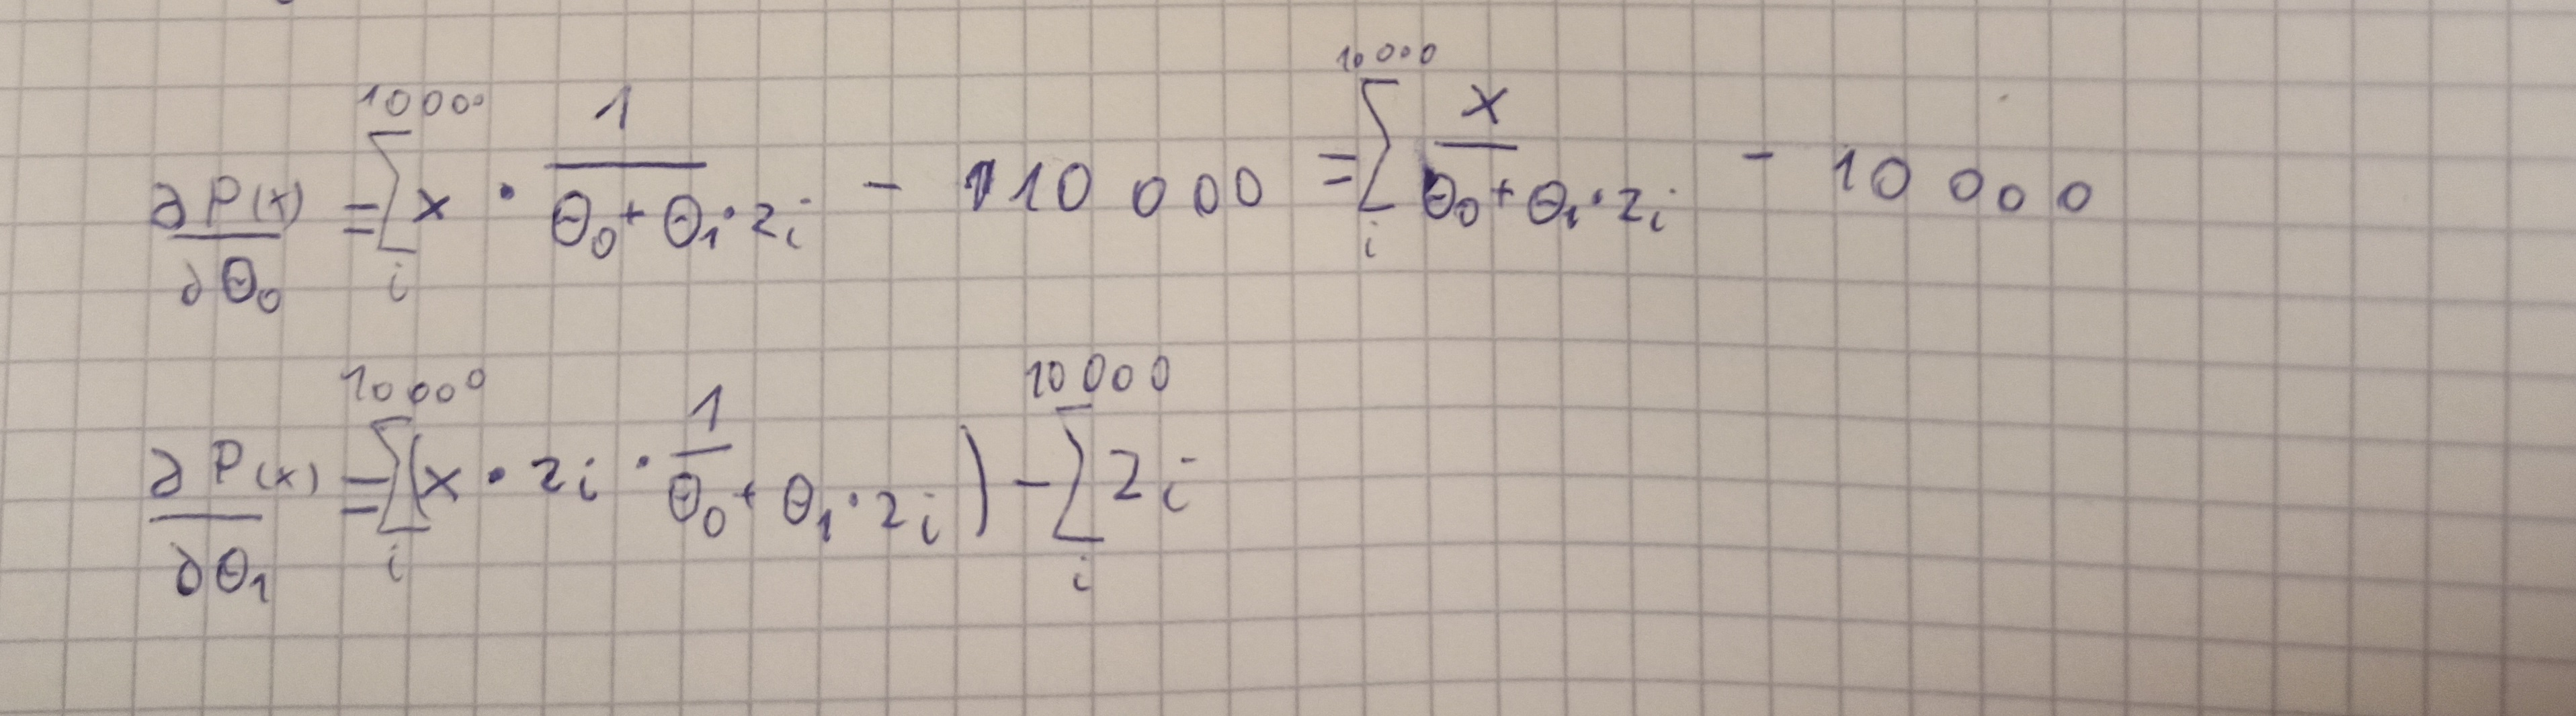

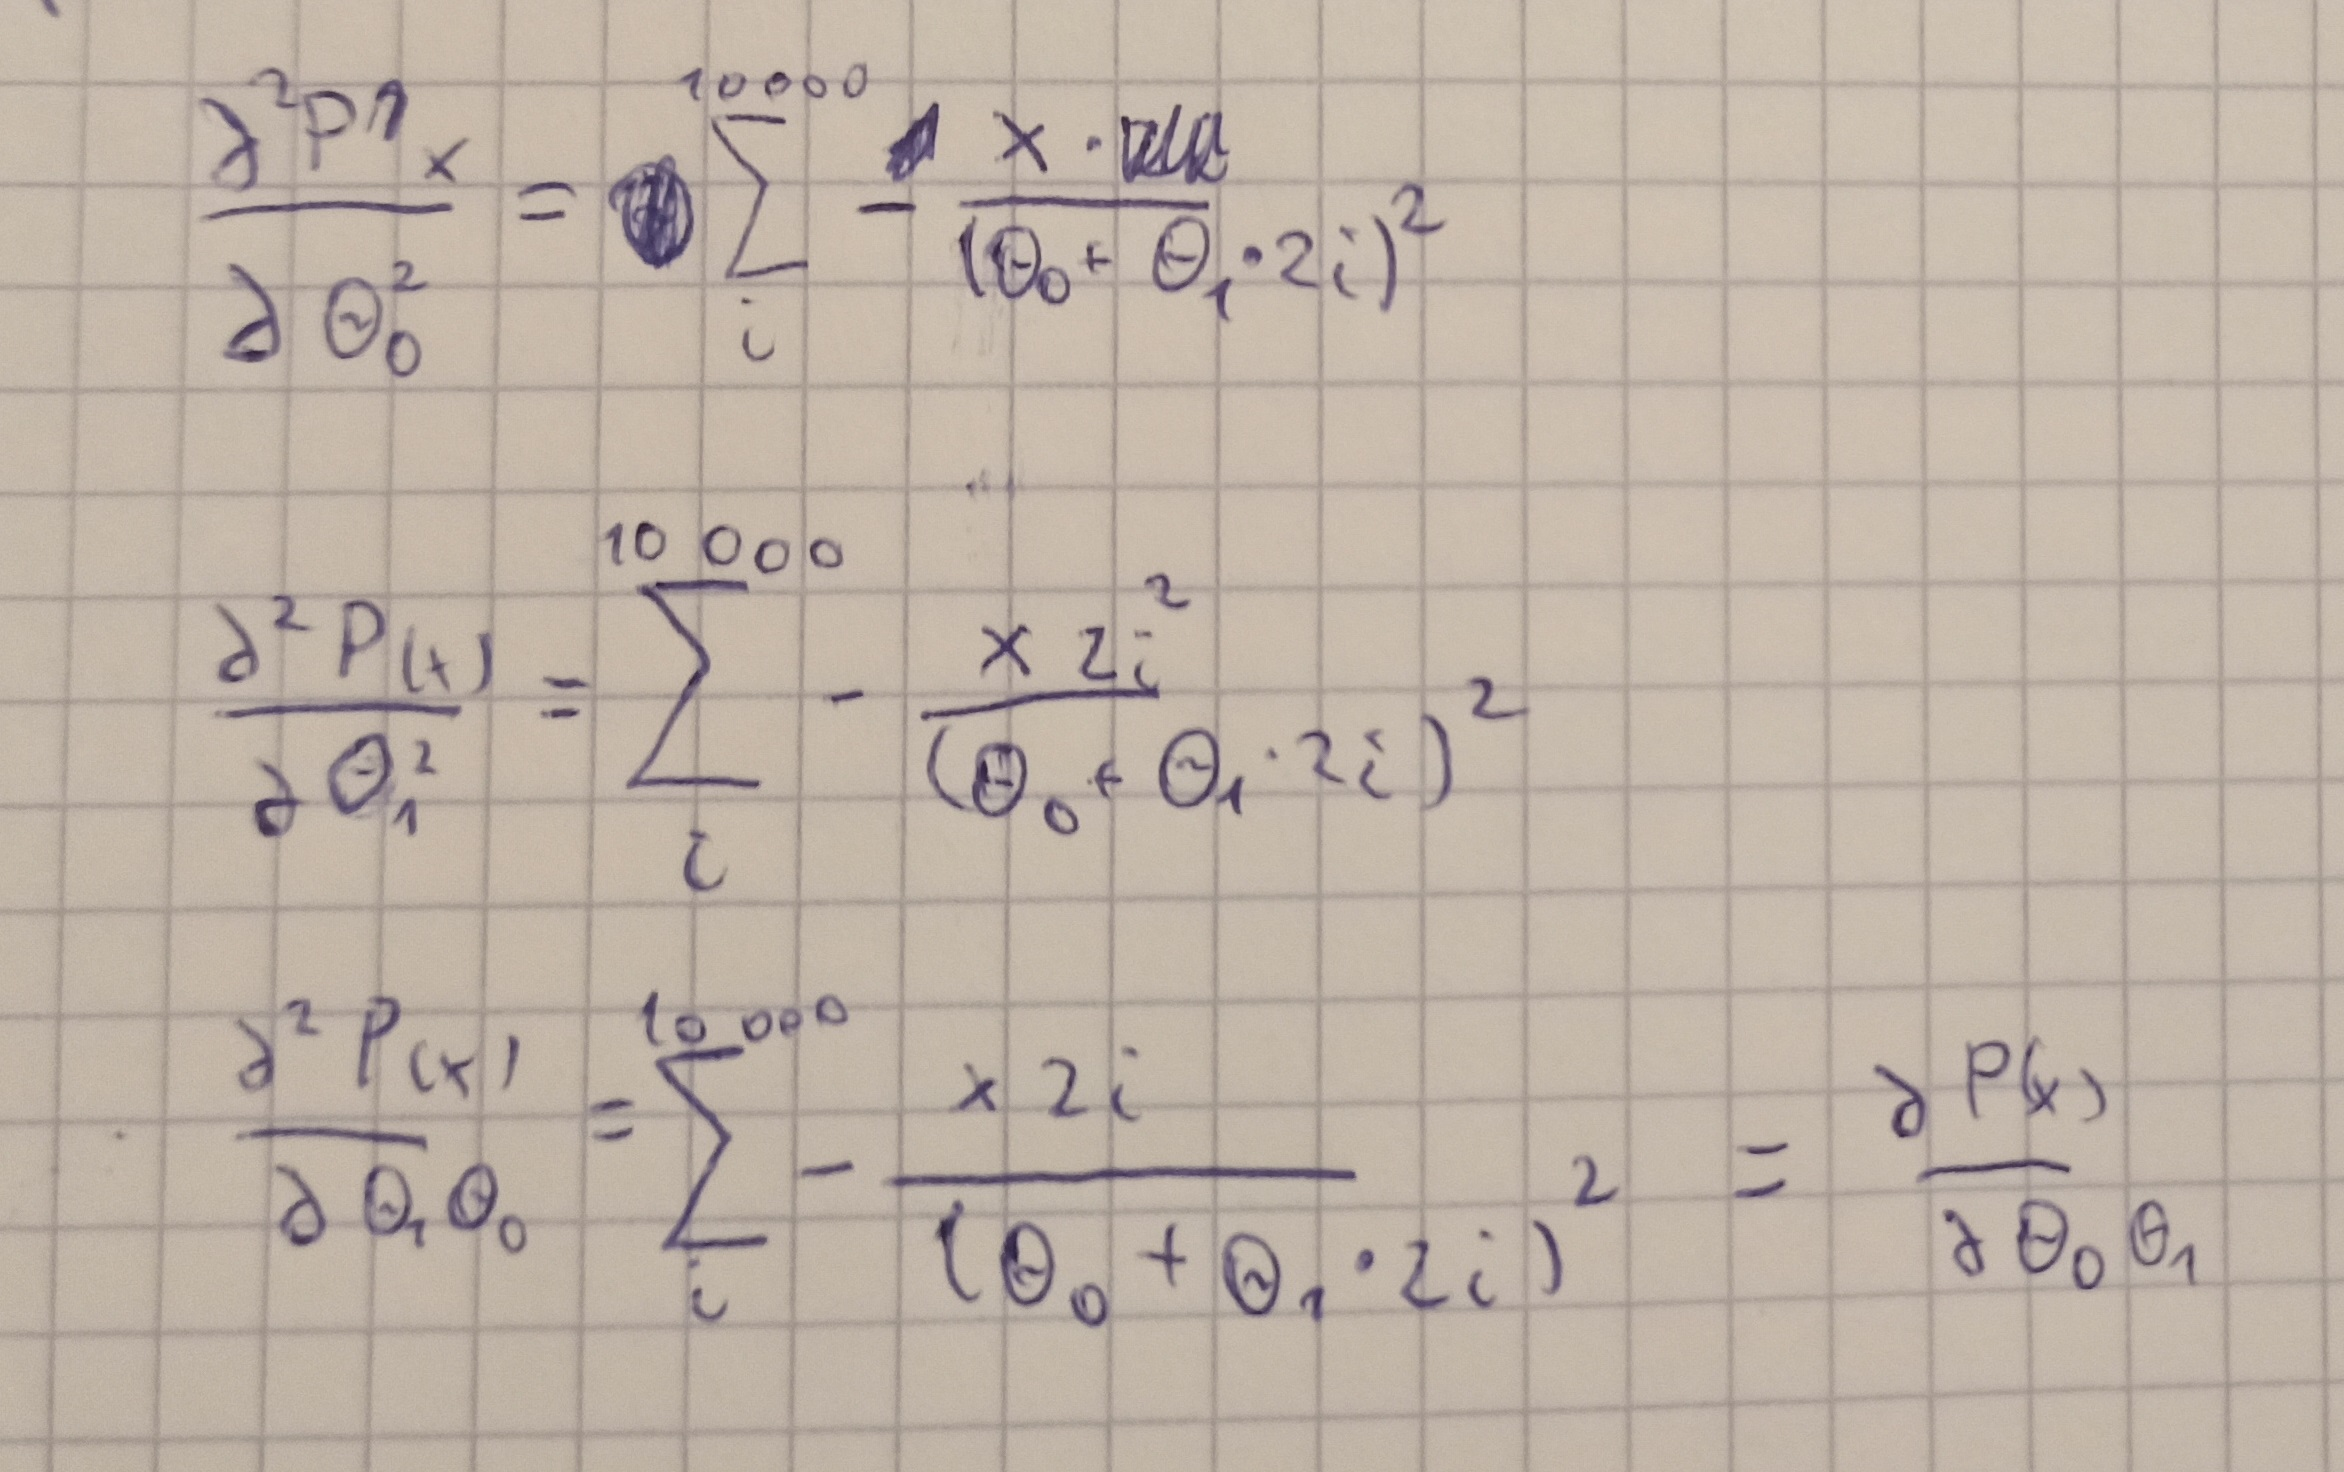

In [ ]:
#5
 ll <- function(par,x){
    
  m <- -(par[1] + par[2] * sum(z)) - log(sum(x)) + log(par[1] + par[2] * sum(z)) * sum(x)
  m
 }
 
 grad <- function(par, x)  {
  g1 <- -length(x) +sum( 1/(par[1] + par[2] * z) * x)
 g2 <- -sum(z) + sum(z/(par[1] + par[2] * z) * x)
  c(g1,g2)}

 hess <- function(par, x) {
h1<-  sum(1/(-(par[1]+ par[2]*z)^2) *x)
h2<- sum(z/(-(par[1]+ par[2]*z)^2) *x)
h3<- sum(z/(-(par[1]+ par[2]*z)^2) *x)
h4<- sum(z^2/(-(par[1]+ par[2]*z)^2) *x)
rbind(c(h1,h2),c(h3,h4))}

a<- maxLik(logLik = ll,grad = grad,hess = hess, start=c(0.01,0.01), x = x, method = "NR") 



summary(a)